# Projet de classification

Dans ce document, on utilise le jeu de données en rapport aux vins blancs pour :

- Implémenter trois algorithmes de classification (kNN, Logistique, GMM supervisé).
- Faire tourner ces 3 approches et illustrer leurs résultats (critère de performance, graphes,...)
- Procéder au réglage des paramètres (par validation-croisée par exemple)
- Comparer de façon critique ces 3 approches.

### Plan : 
1. [**Résumé**](#sec1)
1. [**Importation des librairies et Modules**](#sec2)
1. [**Exploration de la base de données**](#sec3)
1. [**Spécification des modèles**](#sec4)

# Résumé <a id='sec1'></a>

On a testé la performance des trois modèles sur notre jeu de données et on a constaté que le modèle kNN est la plus performante. En effet, pour les trois modèles on trouve :

- kNN : [
    Précision : 64%,
    Paramètres optimisés: {
        'algorithm': 'auto', 
        'leaf_size': 25, 
        'metric': 'manhattan', 
        'n_neighbors': 15, 
        'p': 1, 
        'weights': 'distance'
    }, 
    Modèle : `KNN_model`
]

- Regression logistique : [
    Précision : 53%,
    Paramètres optimisés: {
        'C': 0.0001, 
        'penalty': 'none', 
        'solver': 'newton-cg'
    },
    Modèle : `model_reg`
]

- GMM (QDA) : [
    Précision : 53%,
    Paramètres optimisés: {
        reg_param : 0.1
    },
    Modèle : `QDA_model`
]

L'utilité des paramètres dans la spécification des modèles sont disponibles sur : *[Regression logistique](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)*, *[kNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)* et *[QDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html?highlight=qda)*

# A ajouter des analyses

- Les matrices de confusion de chacun des modèles optimisé.

<img src="log.png">
<img src="knn.png">
<img src="qda.png">

- ***de gauche à droite : Regression logistique, kNN, GMM (QDA)***

- ## **Importation des librairies et Modules**
<a id='sec2'></a> 

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn import metrics
import scipy as spy
from sklearn.model_selection import train_test_split
import shutup; shutup.please()
print('Librairies et modules importé')

Librairies et modules importé


- ## **Exploration de la base de données**
<a id='sec3'></a> 

In [61]:
white_wines = pd.read_csv("./data/winequality-white.csv", sep=";")

In [62]:
print("la dimension des données est : ", white_wines.shape)
white_wines.head()

la dimension des données est :  (4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [63]:
# Verification des types de données dont on dispose
white_wines.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Toutes les variables sont de types `float`, sauf la target (`quality`) qu'est de type `int`.

- ### *Traitement des valeurs manquantes*

In [64]:
pd.isna(white_wines).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- On a remarqué que les données ne contiennent pas de valeurs manquantes. Cependant, on doit détecter les valeurs aberrantes comme  stipulé dans la description.

- ### *Détection des valeurs aberrantes*

In [65]:
white_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [66]:
white_wines.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


Jetons un coup d’œil à la colonne `sucre résiduel`. `count` indique qu’il y a 4898 lignes dans cette colonne. Alors que la moyenne et la MST désignent respectivement les valeurs moyennes et d’écart-type de la colonne, 25% des valeurs sont inférieures à 1,70 et 75% d’entre elles sont inférieures à 9,90. Ce qui est intéressant, c’est que si la valeur moyenne est de 6,39 et la valeur minimale de 0,60, la valeur maximale est de 65,80. Cela ressemble à une valeur aberrante.

- ### *Visualisation des valeurs aberrantes*

In [67]:
white_wines['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

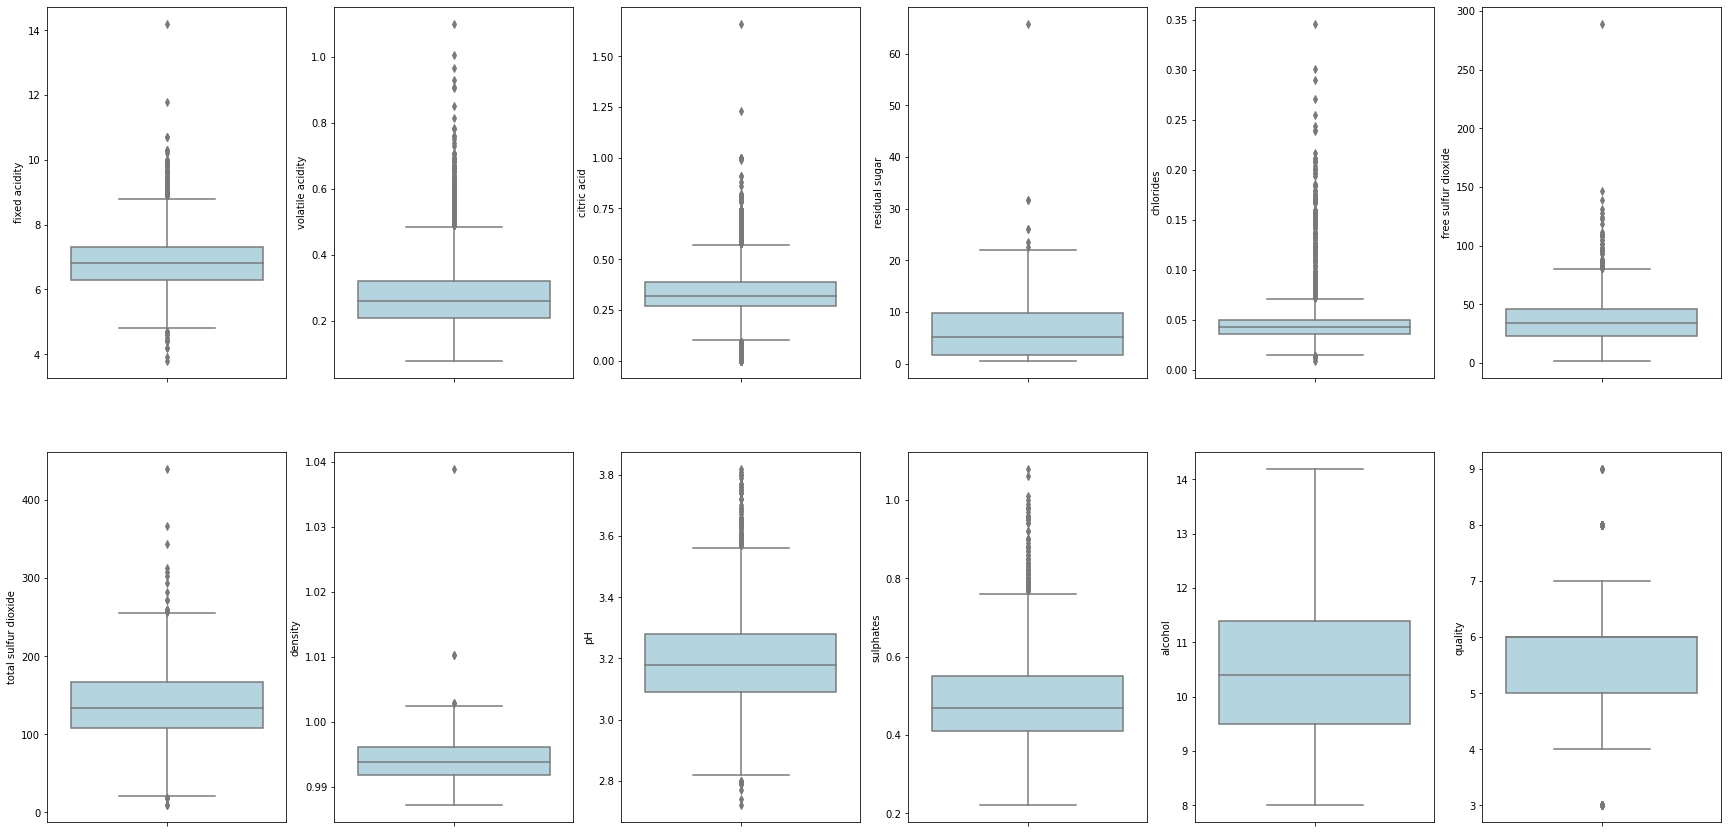

In [68]:
fig,ax = plt.subplots(ncols=6,nrows=2,figsize=(30,15))
index=0
ax=ax.flatten()

for col, value in white_wines.items():
    if col!='type':
        sns.boxplot(y=col,data=white_wines,ax=ax[index], color="lightblue")
        index+=1

- Nous voyons qu'il y a beaucoup de valeurs aberrantes non seulement dans les variables mais aussi dans notre taget qu'est la variable `quality`.
- Nous allons éliminer les valeurs aberrantes car ils sont succeptibles de nuire à la performance de nos modèles.
- Dans cette méthode, les valeurs aberrantes sont définies comme les paramètres qui se situent à 3 écarts types au-dessus de la moyenne.

- ### *Observation la distribution des variables*

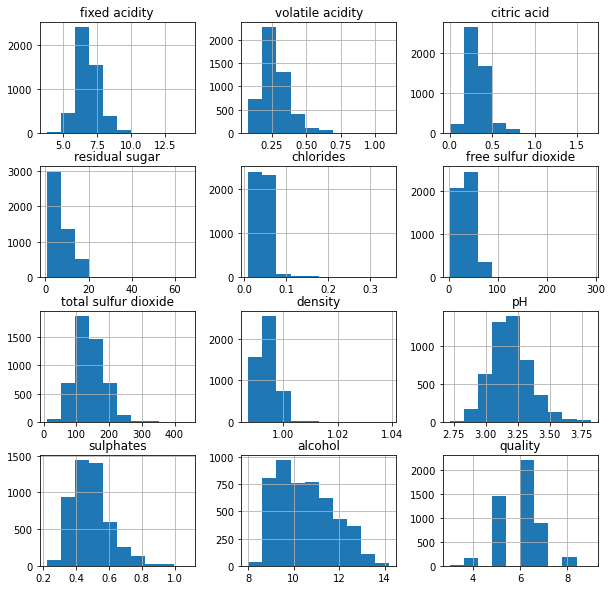

In [69]:
white_wines.hist(figsize = (10, 10));

- ### *Élimination des valeurs aberrantes à l'aide du Z-score*

- Nous allons éliminer les valeurs aberrantes parce qu'elles sont susceptibles d'affecter les performances de notre modèle
- Afin de supprimer les valeurs aberrantes, nous allons utilisé la fonction z-score définie dans la bibliothèque SciPy 
- Dans la plupart des cas, le seuil de détection des valeurs aberrantes est soit $z-score>3$, soit $z-score<-3$.
- Son interprétation consiste à prendre le point de données ou l'observation, à soustraire la moyenne de la population et à la diviser par l'écart type. 

In [70]:
cols = list(white_wines.columns)
zscores = spy.stats.zscore(white_wines[cols], nan_policy='omit')
abs_zscores = np.abs(zscores)
filtered_entries = (abs_zscores < 3).all(axis=1)
new_df = white_wines[filtered_entries]
df = new_df

In [71]:
df.shape

(4487, 12)

- Après avoir supprimé les valeurs aberrantes, il reste 4487 observations dans l'ensemble de données, ce qui signifie qu'environ 8,4% de l'ensemble des données ont été supprimé en tant que valeurs aberrantes.
- Visualisons à nouveau la table des données

In [72]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


- Vérification de la proportionnalité dans le distribution de la target

In [73]:
df['quality'].value_counts(normalize=True)

6    0.454201
5    0.291732
7    0.190550
8    0.035881
4    0.027635
Name: quality, dtype: float64

- En vérifiant les classes de vin, nous voyons qu'il y a un fort déséquilibre entre les classes. En effet,les classes minoritaires étant moins représentées que les classes majoritaires.
- Environs 75% des vins ont une qualité 5 ou 6.

- ### *Vérification de la corrélation entre les variables de la base*

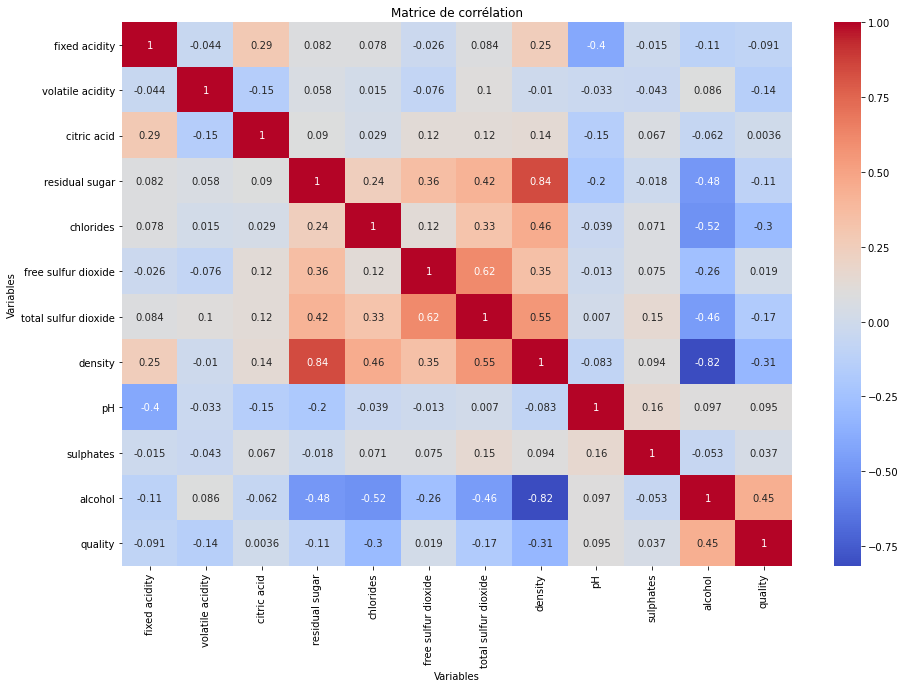

In [74]:
plt.subplots(figsize=(15, 10));
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm");
plt.title("Matrice de corrélation")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

- ### *Tri de la matrice de corrélation*

In [75]:
corr_pairs = df.corr().unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

alcohol           density            -0.816083
density           alcohol            -0.816083
chlorides         alcohol            -0.515220
alcohol           chlorides          -0.515220
residual sugar    alcohol            -0.483354
                                        ...   
                  residual sugar      1.000000
citric acid       citric acid         1.000000
volatile acidity  volatile acidity    1.000000
alcohol           alcohol             1.000000
quality           quality             1.000000
Length: 144, dtype: float64


- #### On decide de supprimer `density` car elle est très corrélé avec `alcohol` et `free sulfure dioxiode`

In [76]:
df.drop(["density", "free sulfur dioxide"], axis=1, inplace=True)
df.shape

(4487, 10)

- ### *Définition des variables d'analyse et de la target.*

In [77]:
# On renomme les variables de la base
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

- ## **Spécification des modèles**
<a id='sec4'></a>

- ### *Définition des Train set et Test set*

In [78]:
y = df['quality']

features = ['fixed_acidity', 'volatile_acidity', 'citric_acid',
            'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
            'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 
            'alcohol','quality']

In [79]:
# Define features X
X = np.asarray(df.iloc[:,:-1])
# Define target y
y = np.asarray(df["quality"])

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=0)
print('Dimension des differentes parties du split :')
print('Train set:', X_train.shape) 
print('Test set:', X_test.shape)

Dimension des differentes parties du split :
Train set: (3589, 9)
Test set: (898, 9)


- ### *Visualisation des données du split*

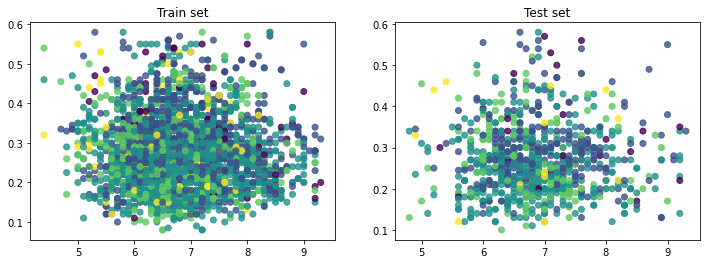

In [80]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1],c=y_test, alpha=0.8)
plt.title('Test set');

- ### **Selection de modèle**

- ### *Logistic Regression*

In [81]:
# Importation du module
from sklearn.linear_model import LogisticRegression
# Entrainnement du modèle
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [82]:
print('train score:', logreg.score(X_train, y_train))
print('test score:', logreg.score(X_test, y_test))

train score: 0.46698244636388964
test score: 0.48997772828507796


- ### *Prediction*

In [83]:
y_pred = logreg.predict(X_test)

- ### *Performance du modèle*

In [84]:
from sklearn.metrics import classification_report, confusion_matrix
#print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 1))
print(confusion_matrix(y_test, y_pred));
print(classification_report(y_test, y_pred, digits=3, zero_division = 1))

[[  0  11  16   0   0]
 [  0  90 178   2   0]
 [  0  67 334  10   0]
 [  0  16 135  16   0]
 [  0   3  16   4   0]]
              precision    recall  f1-score   support

           4      1.000     0.000     0.000        27
           5      0.481     0.333     0.394       270
           6      0.492     0.813     0.613       411
           7      0.500     0.096     0.161       167
           8      1.000     0.000     0.000        23

    accuracy                          0.490       898
   macro avg      0.695     0.248     0.234       898
weighted avg      0.519     0.490     0.429       898



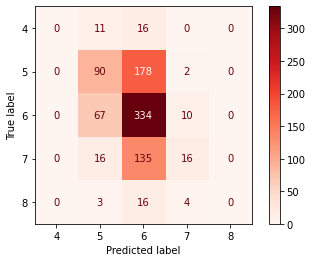

In [85]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(logreg, X_test, y_test, cmap='Reds', values_format='d')

- ### *Optimisation du modèle*

In [86]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'penalty' : ['l1', 'none'], 'C' : np.logspace(-4, 4, 5), 'solver': ['newton-cg']}]
# param_grid = [{'penalty' : ['l1', 'l2'], 'C' : np.logspace(-4, 4, 5), 'solver': ['liblinear']}]
# param_grid={"C":np.logspace(-4, 4, 5), "penalty":["l1","l2"]}

In [87]:

clf_reg = GridSearchCV(logreg, param_grid, cv=10)
clf_reg

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]),
                          'penalty': ['l1', 'none'], 'solver': ['newton-cg']}])

In [88]:
# Entrainnement du modèle optimisé
best_clf_reg = clf_reg.fit(X_train, y_train)
best_clf_reg

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]),
                          'penalty': ['l1', 'none'], 'solver': ['newton-cg']}])

In [89]:
# Présentation des paramètres du modèle optimal
print("Parmètres optimisés : ",best_clf_reg.best_params_)
print("Précision :",best_clf_reg.best_score_)

Parmètres optimisés :  {'C': 0.0001, 'penalty': 'none', 'solver': 'newton-cg'}
Précision : 0.532450475404989


- ### *On sauvegarde le modèle (`model_reg`) et on teste sa perfomance*

In [90]:
model_reg = clf_reg.best_estimator_
precision = model_reg.score(X_test, y_test)
print('Précision (model_reg) :',precision)

Précision (model_reg) : 0.5278396436525612


In [91]:
confusion_matrix(y_test, model_reg.predict(X_test))

array([[  0,  16,  11,   0,   0],
       [  0, 129, 139,   2,   0],
       [  0,  70, 313,  28,   0],
       [  0,   8, 127,  32,   0],
       [  0,   1,  14,   8,   0]], dtype=int64)

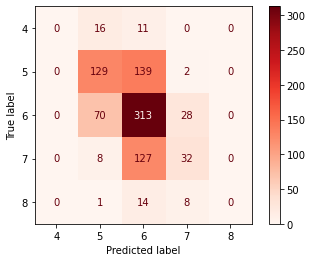

In [92]:
disp = plot_confusion_matrix(best_clf_reg, X_test, y_test, cmap='Reds', values_format='d')

In [93]:
print(classification_report(y_test, model_reg.predict(X_test), digits=3, zero_division = 1))

              precision    recall  f1-score   support

           4      1.000     0.000     0.000        27
           5      0.576     0.478     0.522       270
           6      0.518     0.762     0.617       411
           7      0.457     0.192     0.270       167
           8      1.000     0.000     0.000        23

    accuracy                          0.528       898
   macro avg      0.710     0.286     0.282       898
weighted avg      0.551     0.528     0.490       898



- ### *K Nearest Neighbors (KNN)*

In [94]:
# Importer les modules
from sklearn import neighbors, metrics, model_selection
print('Module importés')

Module importés


In [95]:

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[25, 30, 35, 40],
              'p':[1, 2],
              'metric':['manhattan', 'minkowski']
             }

In [96]:

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(), # un classifieur kNN
                                   param_grid, # hyperparamètres à tester
                                   cv=5, # nombre de folds de validation croisée
                                   scoring=score # score à optimiser
                                  )
clf


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [25, 30, 35, 40],
                         'metric': ['manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [97]:

# Optimiser ce classifieur sur le jeu d'entraînement
KNN_best_clf = clf.fit(X_train, y_train)

In [98]:

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(KNN_best_clf.best_params_)
print("Précision :",KNN_best_clf.best_score_)


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'algorithm': 'auto', 'leaf_size': 25, 'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
Précision : 0.6021184679277243


- ### On sauvegarde le modèle (`KNN_model`) et on teste sa performance.

In [99]:
KNN_model = KNN_best_clf.best_estimator_ 
print('Précision :',KNN_model.score(X_test, y_test))

Précision : 0.6391982182628062


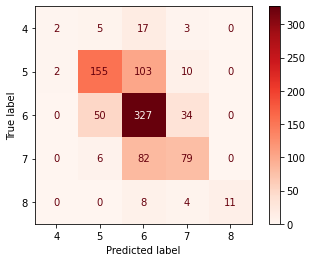

In [100]:
KNN_disp = plot_confusion_matrix(KNN_best_clf, X_test, y_test, cmap='Reds', values_format='d')

- ### *Quadratic Discriminant Analysis (QDA)*

In [101]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [102]:
clf = QuadraticDiscriminantAnalysis()

In [103]:
clf.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [104]:
params = [{'reg_param': [0.1, 0.2, 0.3, 0.4, 0.5]}]
best_clf_qda = GridSearchCV(clf, params, cv=4)
best_clf_qda

GridSearchCV(cv=4, estimator=QuadraticDiscriminantAnalysis(),
             param_grid=[{'reg_param': [0.1, 0.2, 0.3, 0.4, 0.5]}])

In [105]:
# Entrainement du modèle optimisé
best_clf_qda.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=QuadraticDiscriminantAnalysis(),
             param_grid=[{'reg_param': [0.1, 0.2, 0.3, 0.4, 0.5]}])

- ### On enregistre le modèle (`QDA_model`) et on teste sa performance.

In [106]:
best_clf_qda.best_estimator_


QuadraticDiscriminantAnalysis(reg_param=0.1)

In [107]:
QDA_model = best_clf_qda.best_estimator_
print('Précision :',QDA_model.score(X_test, y_test))

Précision : 0.5300668151447662


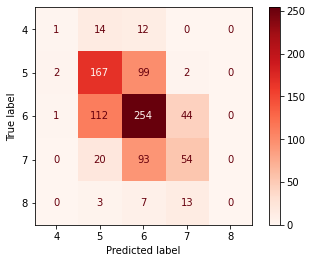

In [108]:
QDA_disp = plot_confusion_matrix(best_clf_qda, X_test, y_test, cmap='Reds', values_format='d')